# Project

In [1]:
#imiporting required libraries for data preprocessing
import pandas as pd                                       
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Complete Covid Data Set

In [2]:
df = pd.read_csv('covid_data.csv')

## Filtering out the required countries assigned to me

In [3]:
fd = df[(df['location'] == 'Northern Cyprus') | (df['location'] == 'Northern Ireland') | (df['location'] == 'Northern Mariana Islands') | (df['location'] == 'Norway') | (df['location'] == 'Oman') | (df['location'] == 'Pakistan') | (df['location'] == 'Palau') | (df['location'] == 'Palestine') | (df['location'] == 'Panama') | (df['location'] == 'Papua New Guinea')]

## Checking if the location column only contains the required countries

In [4]:
fd['location'].value_counts().to_frame()

,count
location,
Norway,1674
Northern Mariana Islands,1674
Palau,1674
Palestine,1674
Oman,1674
Pakistan,1674
Panama,1674
Papua New Guinea,1674
Northern Ireland,1372


## Complete information of the data set after filtering countreis

In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15455 entries, 282207 to 299342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    15455 non-null  object 
 1   continent                                   15455 non-null  object 
 2   location                                    15455 non-null  object 
 3   date                                        15455 non-null  object 
 4   total_cases                                 13392 non-null  float64
 5   new_cases                                   13391 non-null  float64
 6   new_cases_smoothed                          13351 non-null  float64
 7   total_deaths                                13392 non-null  float64
 8   new_deaths                                  13390 non-null  float64
 9   new_deaths_smoothed                         13350 non-null  float64
 10  total_cas

## Number of rows and columns of my data

In [6]:
fd.shape

(15455, 67)

# Data Preprocessing

## Removing null values

In [7]:
#filtering the object columns which contain some null values
for c in fd.columns:
    if(fd[c].dtype == 'object') and ((fd[c].isna().sum()) != 0):
        print(f'Column:{c}\nNull Values: {fd[c].isna().sum()}')

Column:tests_units
Null Values: 11568


In [8]:
#Removing column beacause there are a lot of null values
fd.drop('tests_units', axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\2495900941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop('tests_units', axis=1, inplace=True)


#

In [9]:
#Filtering integer columns
for c in fd.columns:
    if(fd[c].dtype == 'int64') and ((fd[c].isna().sum()) != 0):
        print(f'Column:{c}\nNull Values: {fd[c].isna().sum()}')

### No null values found in int column

#

## Removing null values form decimal columns

In [10]:
count=1
for c in fd.columns:
    if(fd[c].dtype == 'float64') and ((fd[c].isna().sum()) != 0):
        print(f'{count}. {c}\nNull Values: {fd[c].isna().sum()}')
        count+=1

1. total_cases
Null Values: 2063
2. new_cases
Null Values: 2064
3. new_cases_smoothed
Null Values: 2104
4. total_deaths
Null Values: 2063
5. new_deaths
Null Values: 2065
6. new_deaths_smoothed
Null Values: 2105
7. total_cases_per_million
Null Values: 2063
8. new_cases_per_million
Null Values: 2064
9. new_cases_smoothed_per_million
Null Values: 2104
10. total_deaths_per_million
Null Values: 2063
11. new_deaths_per_million
Null Values: 2065
12. new_deaths_smoothed_per_million
Null Values: 2105
13. reproduction_rate
Null Values: 9127
14. icu_patients
Null Values: 14664
15. icu_patients_per_million
Null Values: 14664
16. hosp_patients
Null Values: 13441
17. hosp_patients_per_million
Null Values: 13441
18. weekly_icu_admissions
Null Values: 15312
19. weekly_icu_admissions_per_million
Null Values: 15312
20. weekly_hosp_admissions
Null Values: 13946
21. weekly_hosp_admissions_per_million
Null Values: 13946
22. total_tests
Null Values: 12553
23. new_tests
Null Values: 12132
24. total_tests_per

## Removing columns with more than 70% null values

In [11]:
for c in fd.columns:
    if(fd[c].dtype == 'float64') and ((fd[c].isna().sum()) > 10818):
        fd.drop(c, axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\223117517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop(c, axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\223117517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop(c, axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\223117517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop(c, axis=1, inplace=True)
C:\Users\D

## Filling the remaining null values with the mean

In [12]:
for c in fd.columns:
    if(fd[c].dtype == 'float64') and ((fd[c].isna().sum()) != 0):
        fd[c] = fd[c].fillna(fd[c].mean())

C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\3165186506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd[c] = fd[c].fillna(fd[c].mean())


## Checking number of columns and rows

In [13]:
fd.shape

(15455, 36)

## Checking if there is any null value missed out

In [14]:
fd.isna().sum().sum()

np.int64(0)

#

## Removing zeros from the data

In [15]:
for c in fd.columns:
    if(fd[c].dtype == 'object') and (((fd[c]==0).sum()) != 0):
        print(f'{c}____{(fd[c]==0).sum()}')

In [16]:
for c in fd.columns:
    if(fd[c].dtype == 'int64') and (((fd[c]==0).sum()) != 0):
        print(f'{c}____{(fd[c]==0).sum()}')

### No zeros found in both object and integer columns

In [17]:
# checking in float columns 
count=1
for c in fd.columns:
    if(fd[c].dtype == 'float64') and (((fd[c]==0).sum()) != 0):
        print(f'{count}. {c}\nNull Values: {fd[c].isna().sum()}')
        count+=1

1. total_cases
Null Values: 0
2. new_cases
Null Values: 0
3. new_cases_smoothed
Null Values: 0
4. total_deaths
Null Values: 0
5. new_deaths
Null Values: 0
6. new_deaths_smoothed
Null Values: 0
7. total_cases_per_million
Null Values: 0
8. new_cases_per_million
Null Values: 0
9. new_cases_smoothed_per_million
Null Values: 0
10. total_deaths_per_million
Null Values: 0
11. new_deaths_per_million
Null Values: 0
12. new_deaths_smoothed_per_million
Null Values: 0
13. reproduction_rate
Null Values: 0
14. new_vaccinations_smoothed
Null Values: 0
15. new_vaccinations_smoothed_per_million
Null Values: 0
16. new_people_vaccinated_smoothed
Null Values: 0
17. new_people_vaccinated_smoothed_per_hundred
Null Values: 0
18. stringency_index
Null Values: 0


## Removing the columns with more than enough zero values

In [18]:
fd.drop(['new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\2998520528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop(['new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million'], axis=1, inplace=True)


## Replacing the reamining zeros with the mean of its

In [19]:
for c in fd.columns:
    if(fd[c].dtype == 'float64') and (((fd[c]==0).sum()) != 0):
        fd[c] = fd[c].replace(0, fd[c].mean())

C:\Users\DELL\AppData\Local\Temp\ipykernel_7652\3908163804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd[c] = fd[c].replace(0, fd[c].mean())


## Checking if there are any duplicates in data

In [20]:
duplicate_mask = df.duplicated()
duplicate_mask.sum()

np.int64(0)

## Converting the categorical columns into numerical columns

In [20]:
le = LabelEncoder()

In [21]:
for c in fd.columns:
    if(fd[c].dtype == 'object'):
        fd[c] = le.fit_transform(fd[c])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12788\1470482453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd[c] = le.fit_transform(fd[c])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12788\1470482453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd[c] = le.fit_transform(fd[c])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12788\1470482453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

## Finding correlation between columns

In [22]:
correlation = fd.corr()

## Creating a heatmap to get a better view of the correlation between columns

<Axes: >

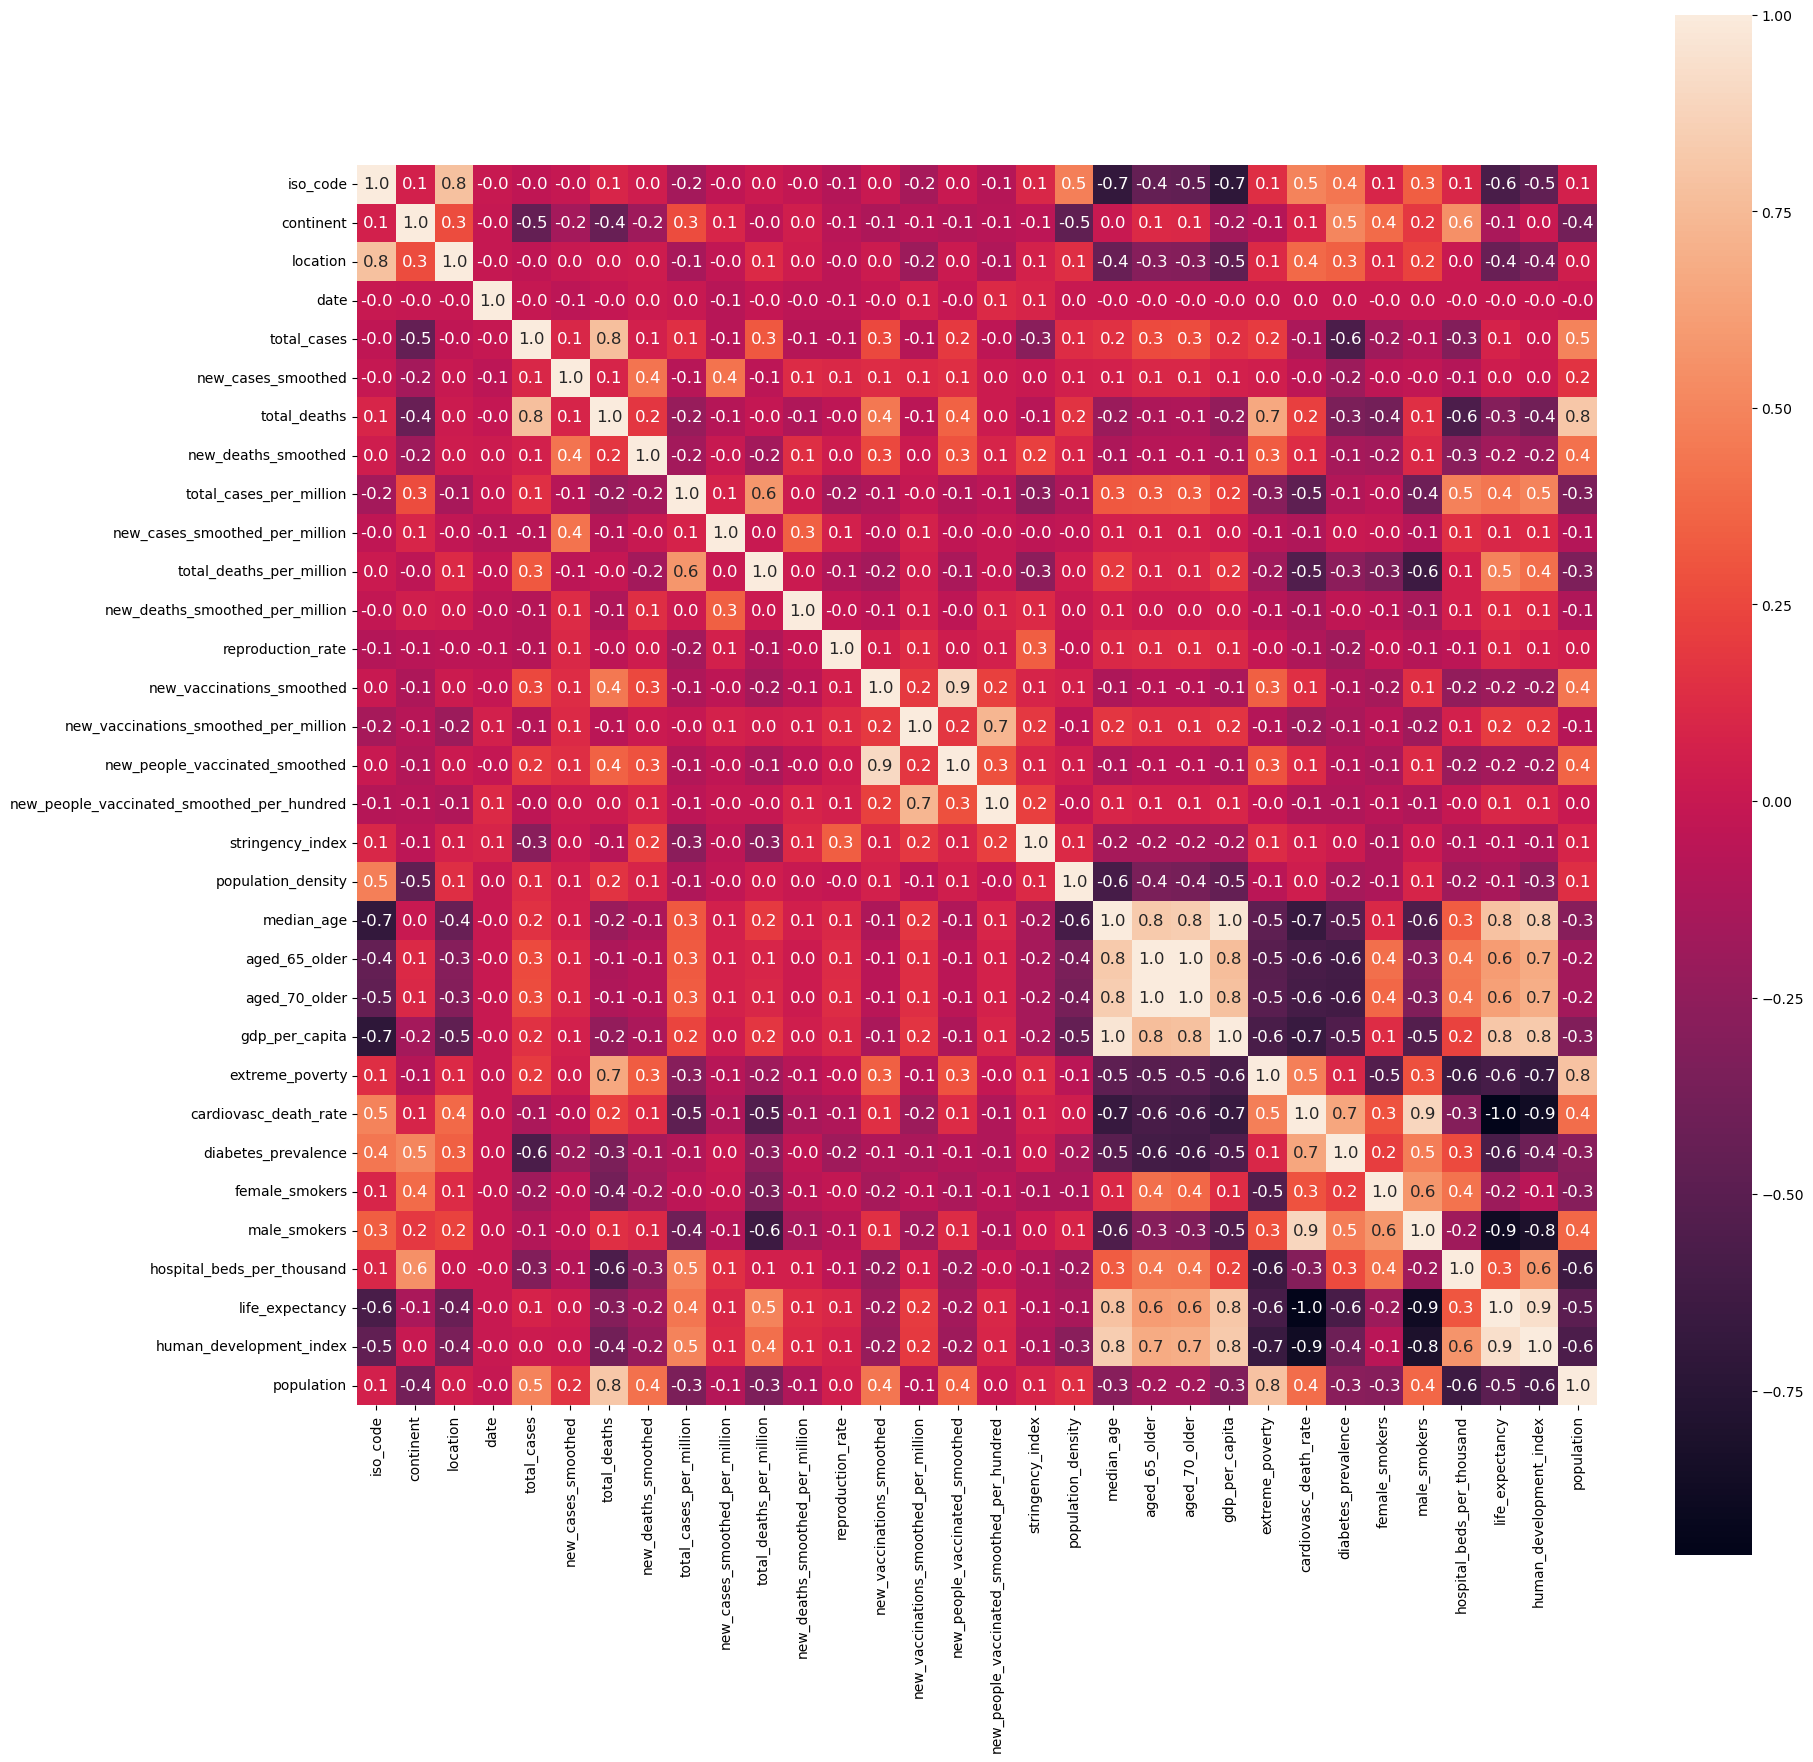

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':12})

## Creating 2 group to get a better view of correlation between columns

In [24]:
g1 = fd.iloc[ : , : 16]
g1.shape

(15455, 16)

In [25]:
g2 = fd.iloc[ : , 16: ]
g2.shape

(15455, 16)

## 1st Group's heatmap

<Axes: >

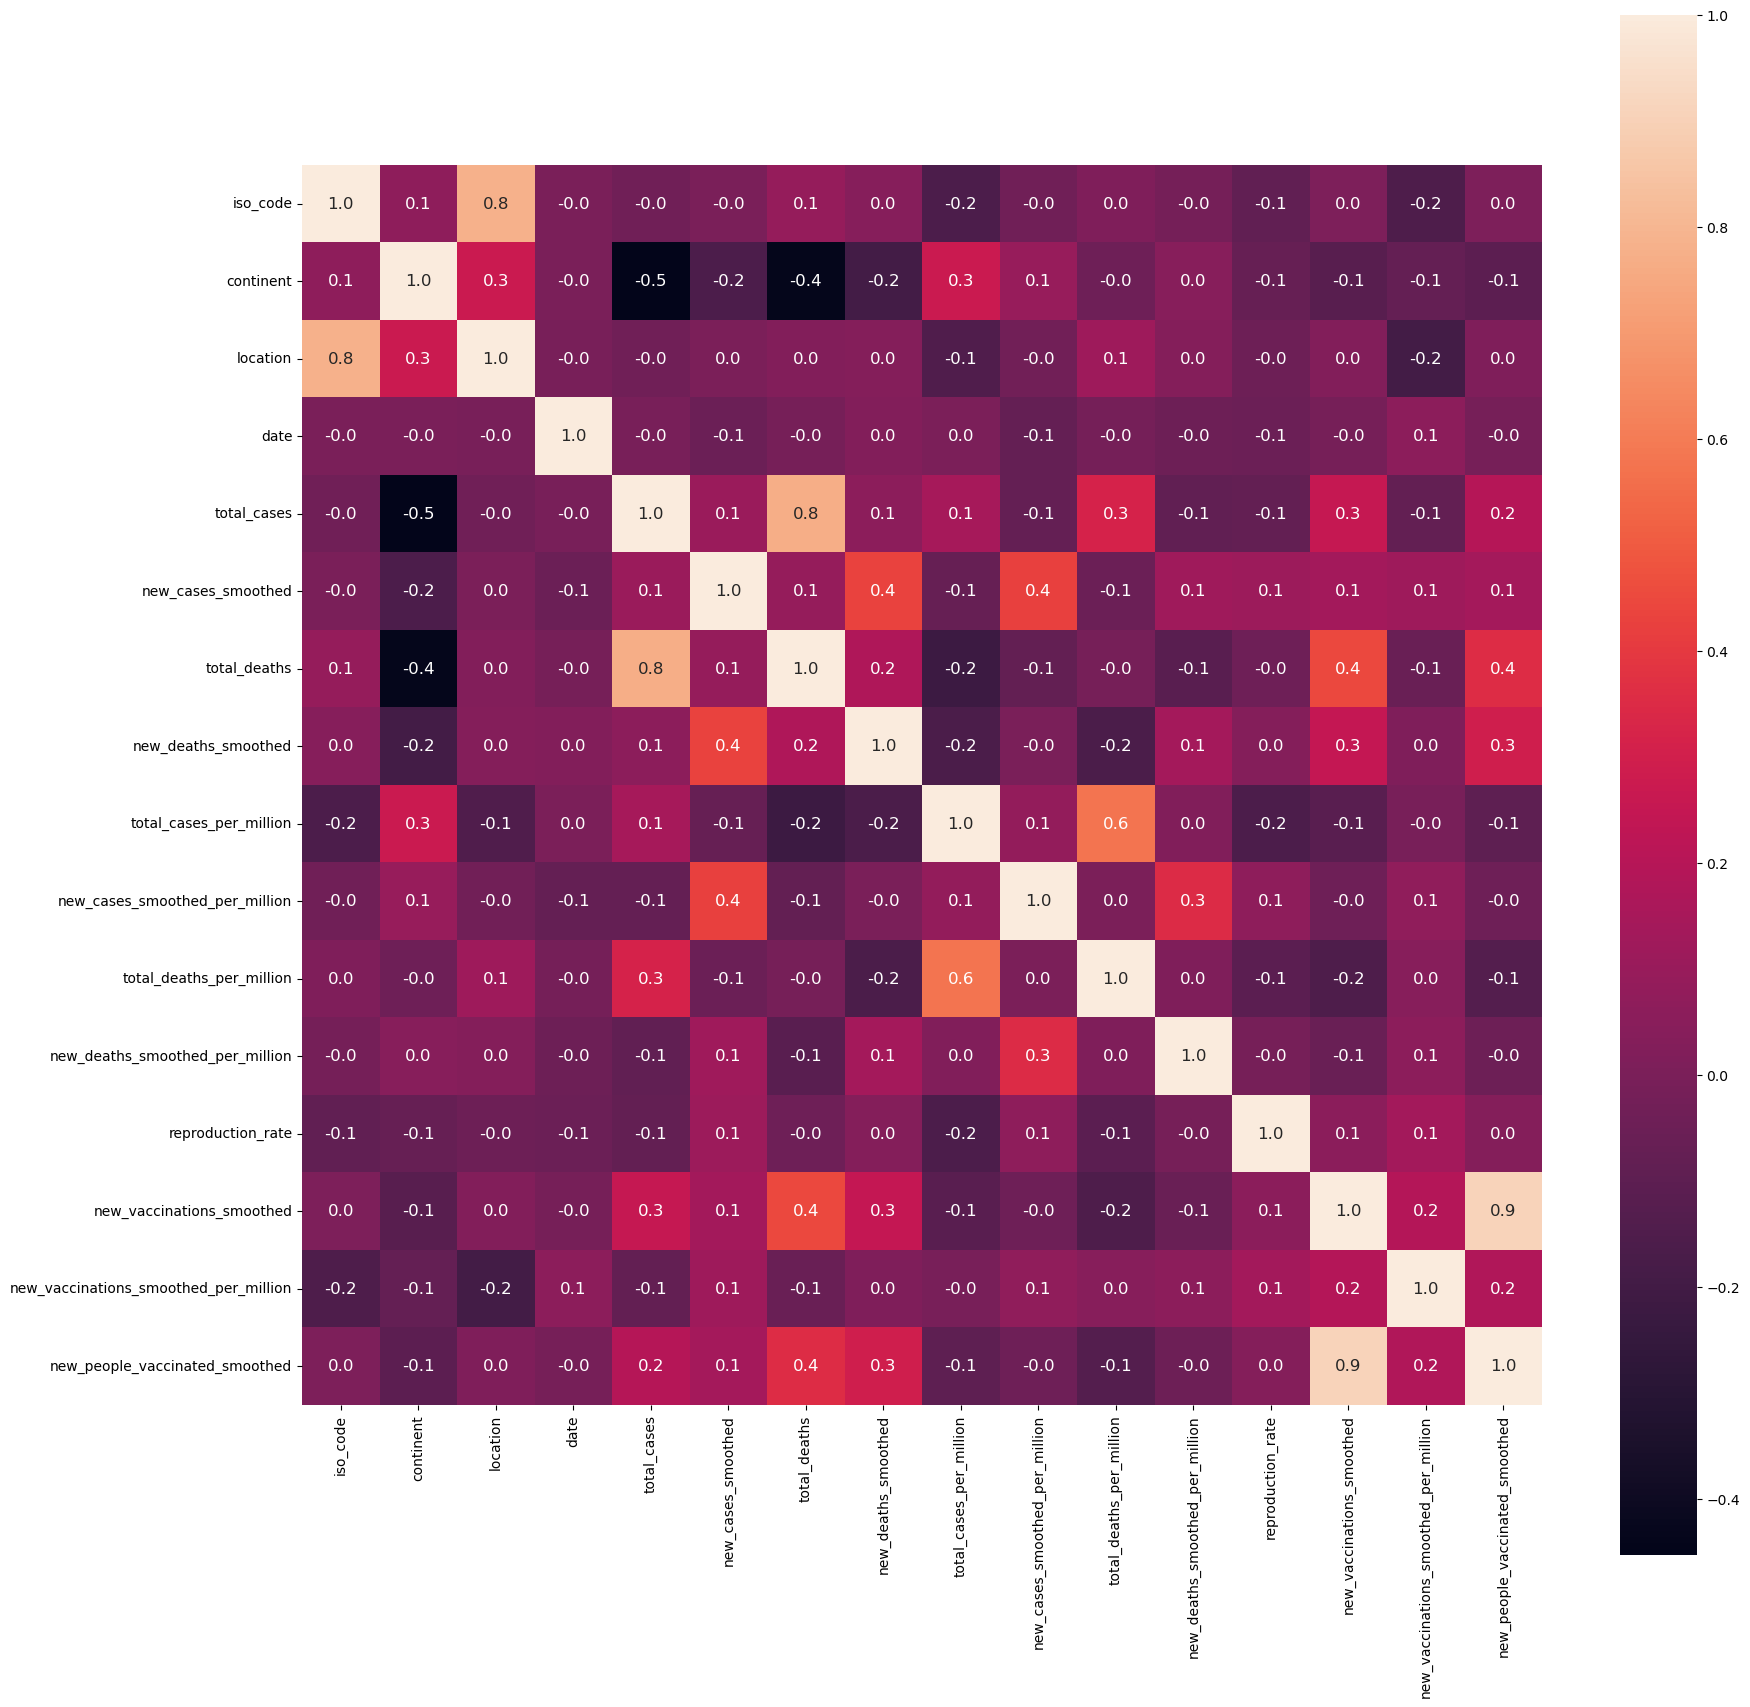

In [26]:
correlation = g1.corr() 
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':12})

## Dropping the columns creating noise

In [27]:
fd.drop(['iso_code','date','new_deaths_smoothed_per_million'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12788\3764678635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop(['iso_code','date','new_deaths_smoothed_per_million'], axis=1, inplace=True)


## Dropping population column according to requirement

In [28]:
fd.drop('population', axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12788\1355275725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop('population', axis=1, inplace=True)


## 2nd Group heatmap

<Axes: >

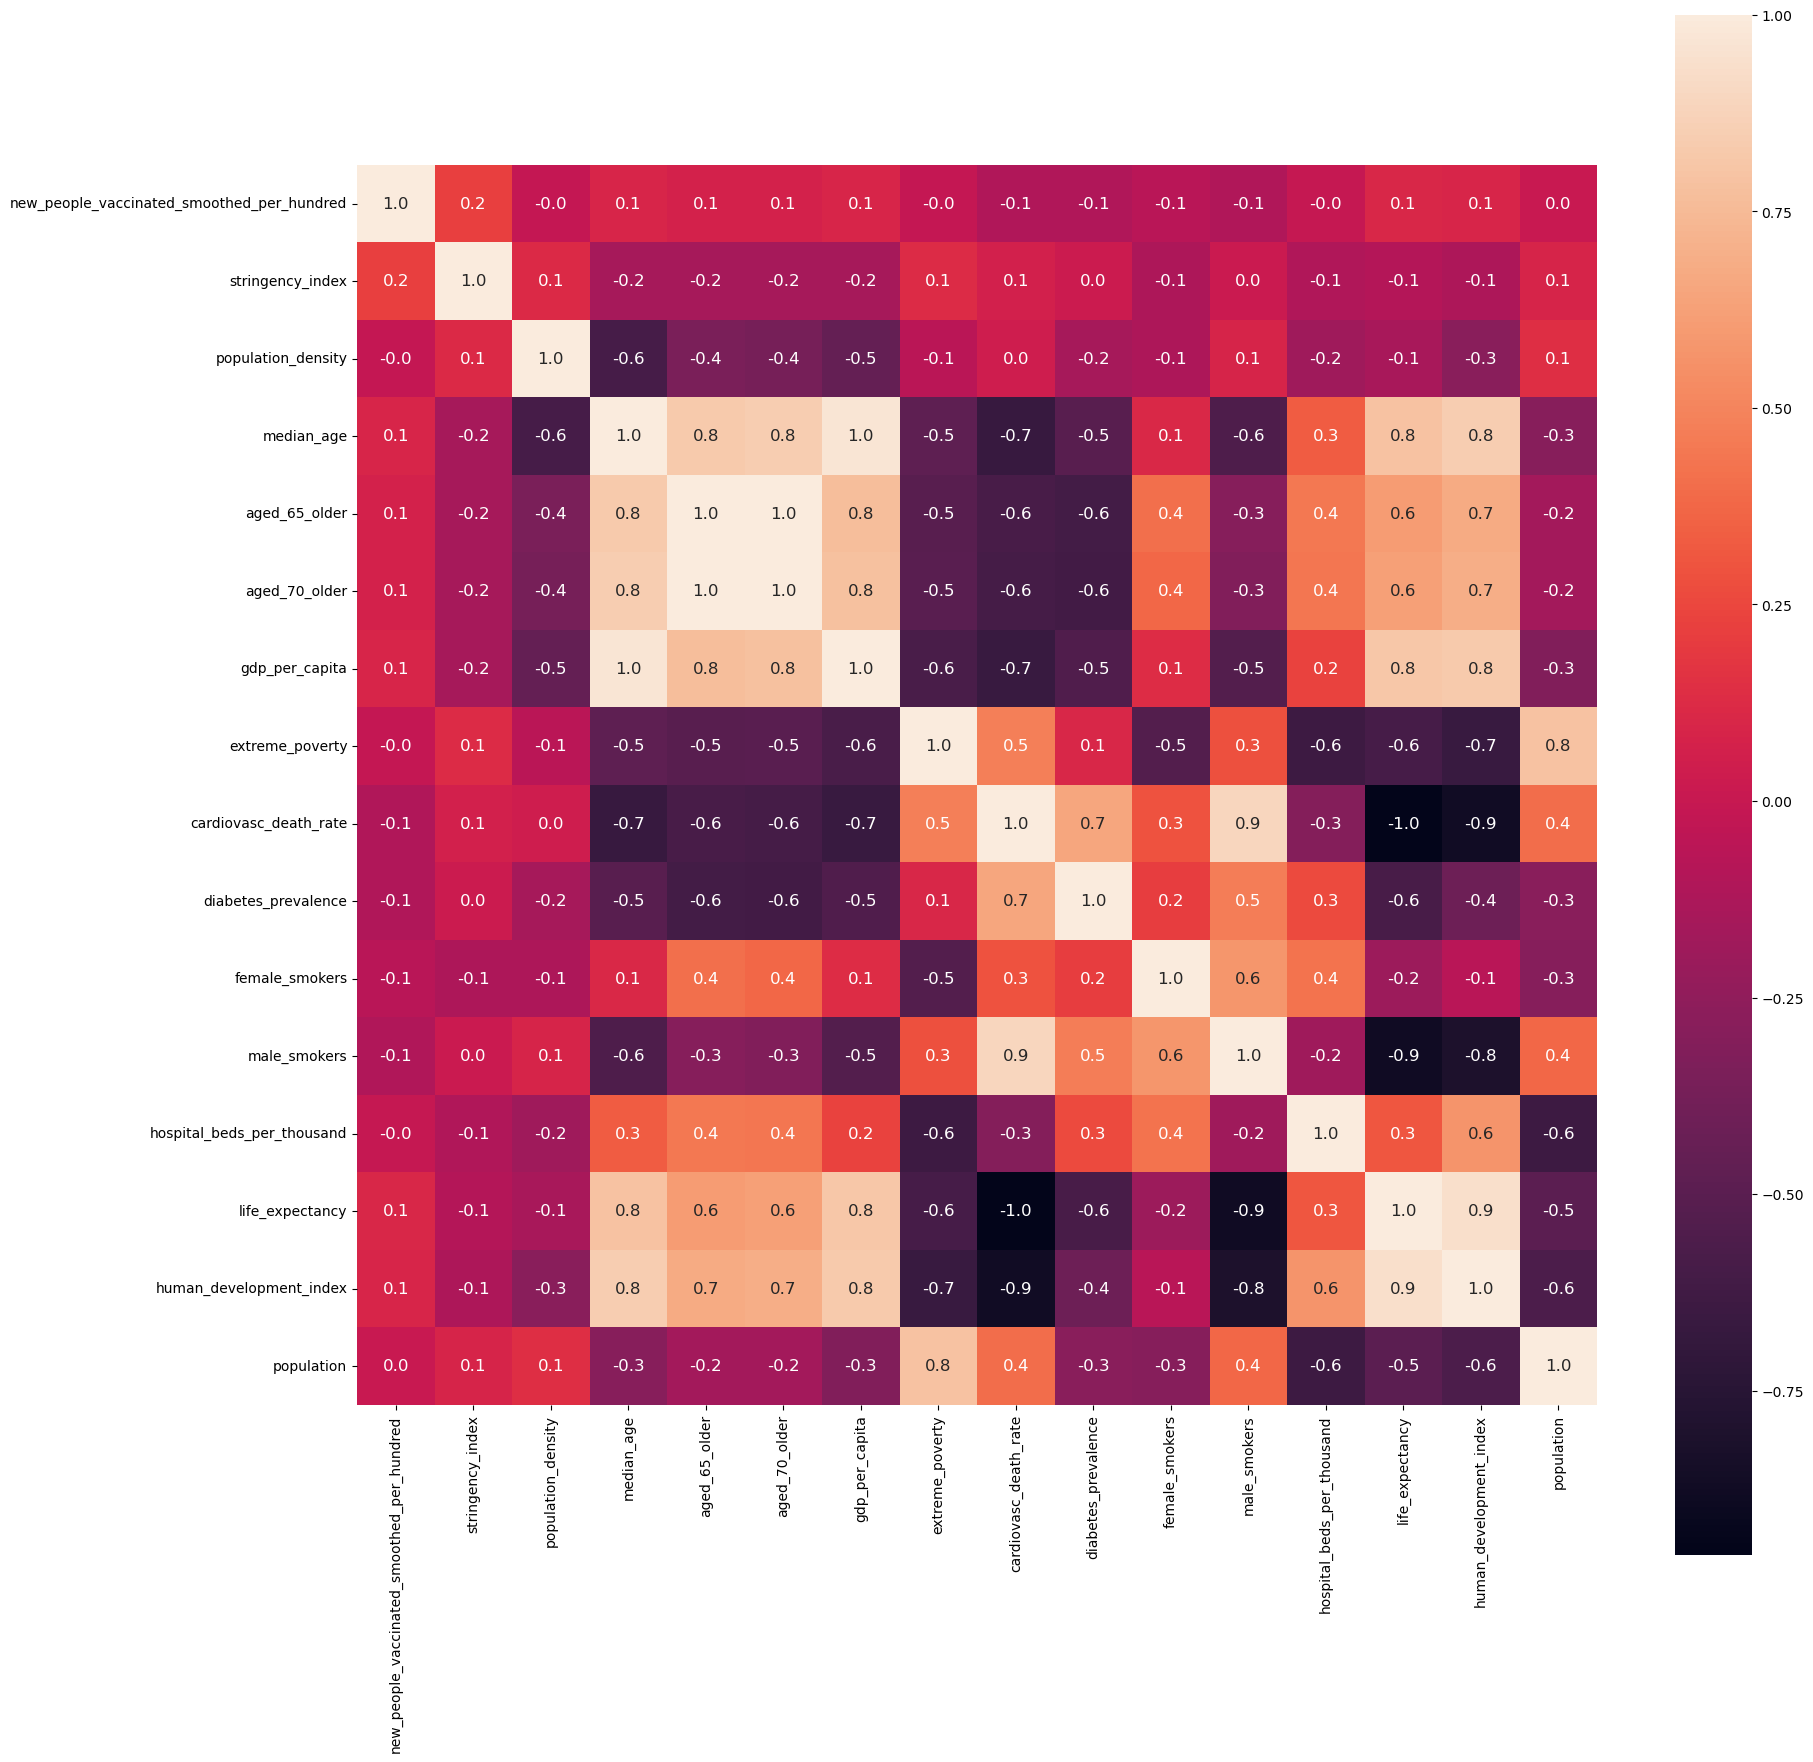

In [29]:
correlation = g2.corr() 
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':12})

# Data Spliting

In [30]:
X = fd.drop('location', axis=1) #removing target column from the X
Y = fd['location']              #Only target column assigned to the Y

In [31]:
X.shape

(15455, 27)

In [32]:
Y.shape

(15455,)

## Training and testing

In [33]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y, test_size=0.30, random_state=35)
print("Size of train X = " , len(X_TRAIN))
print("Size of train Y = " , len(Y_TRAIN))
print("Size of test X = " , len(X_TEST))
print("Size of test Y = " , len(Y_TEST))

Size of train X =  10818
Size of train Y =  10818
Size of test X =  4637
Size of test Y =  4637


## GaussianNB

In [34]:
from sklearn.naive_bayes import GaussianNB
bilal=GaussianNB()

bilal.fit(X_TRAIN,Y_TRAIN)

GaussianNB()

In [35]:
training_data_pred = bilal.predict(X_TRAIN)
print(len(training_data_pred))
print(training_data_pred)

10818
[9 8 0 ... 6 1 4]


In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN,training_data_pred)

print("Training accuracy : ",accuracy)

Training accuracy :  0.9531336661120355


In [37]:
training_data_pred = bilal.predict(X_TEST)
print(len(training_data_pred))
print(training_data_pred)

4637
[5 3 4 ... 9 4 3]


In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST,training_data_pred)

print("TEsting accuracy : ",accuracy)

TEsting accuracy :  0.9568686650851844


## LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
bilal = LogisticRegression(solver="liblinear",random_state=10)
bilal.fit(X_TRAIN,Y_TRAIN)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=10, solver='liblinear')

In [40]:
training_data_predict = bilal.predict(X_TRAIN)
print(training_data_predict)

[9 8 1 ... 6 1 4]


In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN,training_data_predict)
print("Training accuracy : ",accuracy)

Training accuracy :  0.9797559622850804


In [42]:
training_data_pred = bilal.predict(X_TEST)
print(len(training_data_pred))
print(training_data_pred)

4637
[5 3 4 ... 9 4 3]


In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST,training_data_pred)
print("Testing accuracy : ",accuracy)

Testing accuracy :  0.9797282725900367


## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
bilal = DecisionTreeClassifier(random_state=10)

In [45]:

bilal.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(random_state=10)

In [46]:
training_data_predict = bilal.predict(X_TRAIN)
print(training_data_predict)

[9 8 1 ... 6 1 4]


In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN,training_data_predict)
print("Training accuracy : ",accuracy)

Training accuracy :  1.0


In [48]:
test_data_pred = bilal.predict(X_TEST)
print(len(test_data_pred))
print(test_data_pred)

4637
[5 3 4 ... 9 4 3]


In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST,test_data_pred)
print("Testing ccuracy : ",accuracy)

Testing ccuracy :  1.0


## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
bilal = RandomForestClassifier(n_estimators=10,random_state=5)

In [51]:
bilal.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(n_estimators=10, random_state=5)

In [52]:
training_data_predict = bilal.predict(X_TRAIN)
print(training_data_predict)

[9 8 1 ... 6 1 4]


In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN,training_data_predict)
print("Training accuracy : ",accuracy)

Training accuracy :  0.9999075614716214


In [54]:
test_data_pred = bilal.predict(X_TEST)
print(len(test_data_pred))
print(test_data_pred)

4637
[5 3 4 ... 9 4 3]


In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST,test_data_pred)
print("Testing accuracy : ",accuracy)

Testing accuracy :  0.9997843433254259


## Linear SVC

In [56]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)
svm.fit(X_TRAIN, Y_TRAIN)


LinearSVC(max_iter=5000)

In [57]:
training_data_predict = bilal.predict(X_TRAIN)
print(training_data_predict)

[9 8 1 ... 6 1 4]


In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN,training_data_predict)
print("Training accuracy : ",accuracy)

Training accuracy :  0.9999075614716214


In [59]:
test_data_pred = bilal.predict(X_TEST)
print(len(test_data_pred))
print(test_data_pred)

4637
[5 3 4 ... 9 4 3]


In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST,test_data_pred)
print("Testing accuracy : ",accuracy)

Testing accuracy :  0.9997843433254259


# Conclusion

#### Random Forest Classifier gives the best accuracy among these alogorithms. Where GuassianNB and Logistic Regression also performed well. But the Decision Tree Classifer outfits due to some reasons. And the SVM alogorithm training is not completing on this data.